In [10]:
import yfinance as yf

#importing the dataset
ticker='NVDA'
data=yf.download(ticker,period='1y',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-11,46.147999,46.162998,44.312000,45.178001,45.168198,473966000
2023-09-12,44.737999,45.673000,44.530998,44.869999,44.860264,349256000
2023-09-13,44.599998,45.930000,44.502998,45.485001,45.475136,398355000
2023-09-14,45.950001,45.987000,45.131001,45.581001,45.571114,370097000
2023-09-15,45.341000,45.598999,43.807999,43.900002,43.890476,506831000
...,...,...,...,...,...,...
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300
2024-09-05,104.989998,109.650002,104.760002,107.209999,107.209999,306850700


In [11]:
data.head()
#first 5 values


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-11,46.147999,46.162998,44.312000,45.178001,45.168198,473966000
2023-09-12,44.737999,45.673000,44.530998,44.869999,44.860264,349256000
2023-09-13,44.599998,45.930000,44.502998,45.485001,45.475136,398355000
2023-09-14,45.950001,45.987000,45.131001,45.581001,45.571114,370097000
2023-09-15,45.341000,45.598999,43.807999,43.900002,43.890476,506831000


In [36]:
45.178001403808594-44.869998931884766 #verifying the differencing

0.3080024719238281

In [9]:
data.info()
#most datatypes in float
#only volume is in int

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-09-11 to 2024-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [13]:
#find missing values

data.isnull().sum() #checks the number of missing values
#.isnull() returns 1 if there are any missing values

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [14]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,80.316980,81.830972,78.596355,80.277155,80.270859,4.354337e+08
std,30.528925,31.231416,29.563903,30.372650,30.375501,1.391943e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,6.148618e+07
25%,48.426001,49.105501,47.802500,48.342499,48.334135,3.489945e+08
50%,83.926003,86.000000,81.254997,83.041000,83.034180,4.150390e+08
75%,107.064999,110.360001,104.440002,106.839500,106.835129,4.954875e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.142269e+09


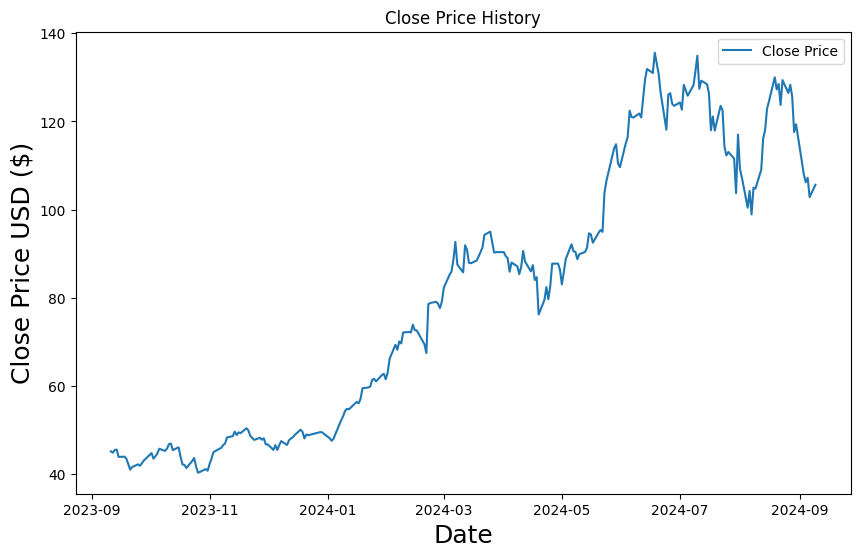

In [19]:
#viusualise the stock trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(data['Close'],label='Close Price')
plt.legend() #places a legend on the axis
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

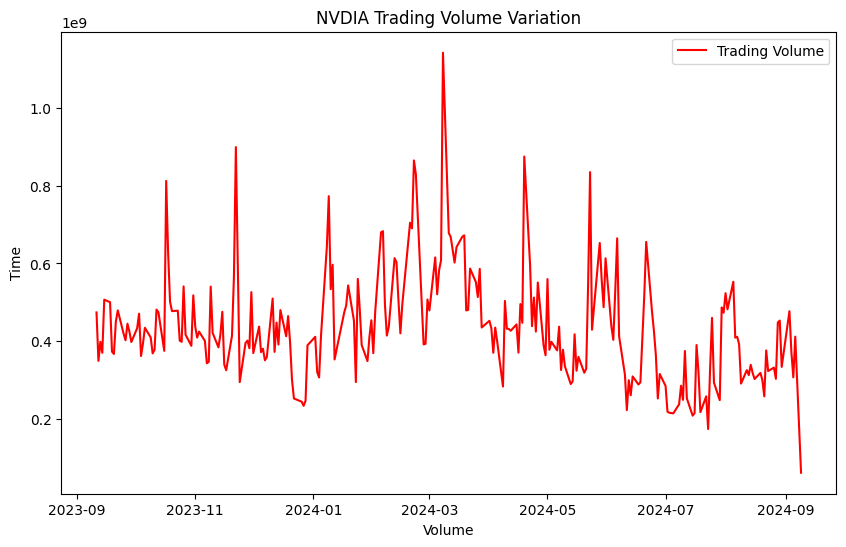

In [21]:
#Understanding trading volume
plt.figure(figsize=(10,6))
plt.plot(data['Volume'], label='Trading Volume', color='Red')
plt.legend()
plt.title('NVDIA Trading Volume Variation')
plt.ylabel('Time')
plt.xlabel('Volume')
plt.show()

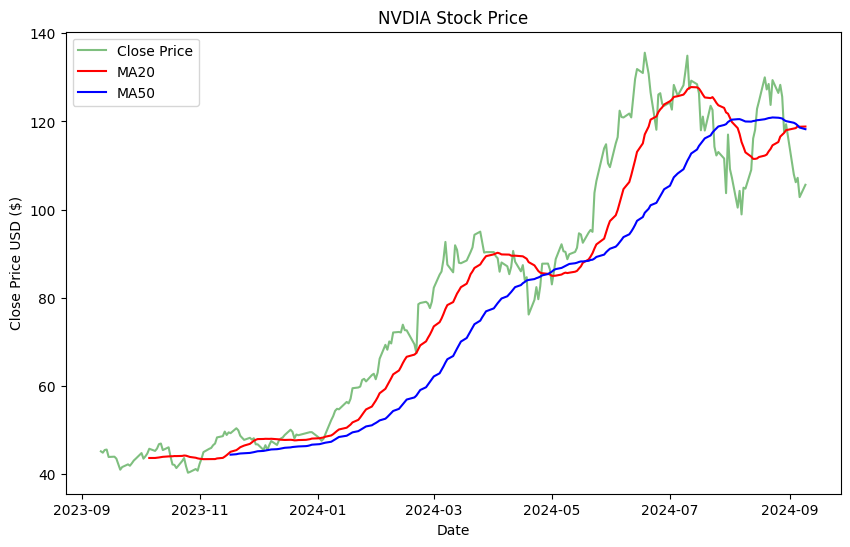

In [23]:
#calculating the moving averages for 20 days and 50 days

data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()

#plotting the MA20 and MA50
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5, color='Green') #alpha controls the transparency
plt.plot(data['MA20'], label='MA20', color='red')
plt.plot(data['MA50'], label='MA50', color='blue')
plt.title('NVDIA Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

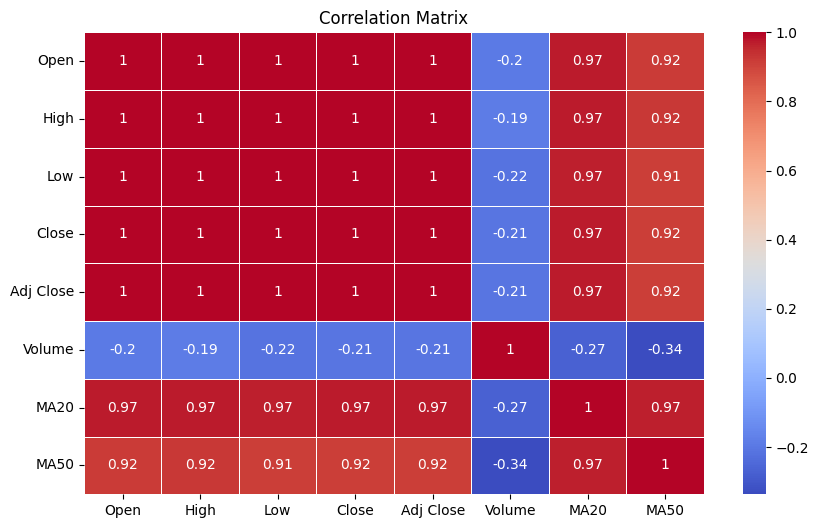

In [26]:
#correlation between stock prices(open, high, low,close) and volume
#check if any correlation exists

import seaborn as sns
correlation_matrix=data.corr()
#plotting
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()


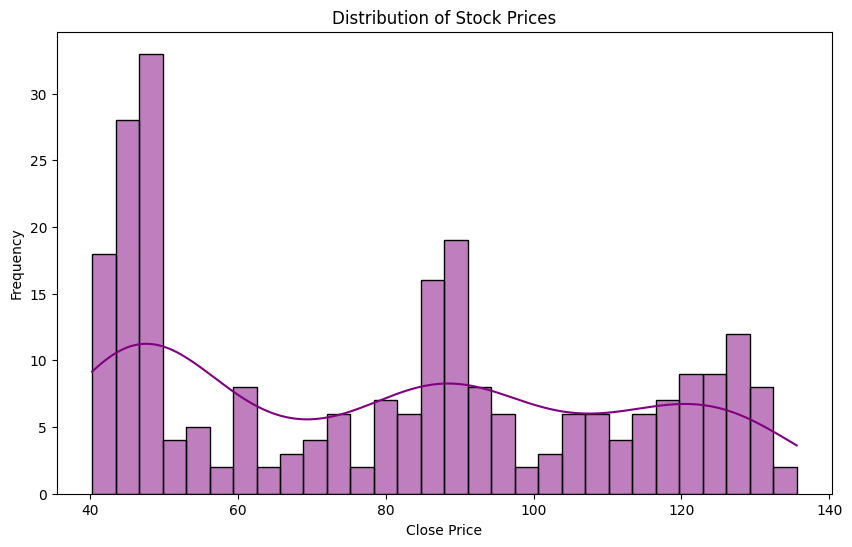

In [29]:
#distribution of stock prices
plt.figure(figsize=(10,6))
sns.histplot(data['Close'], kde=True, bins=30,color='purple')
plt.title('Distribution of Stock Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show() #bins=price range
#For eg if the frequency for a particular price range is 10, it means there were 10 days (or data points) where Nvidia's Close price fell within that range.



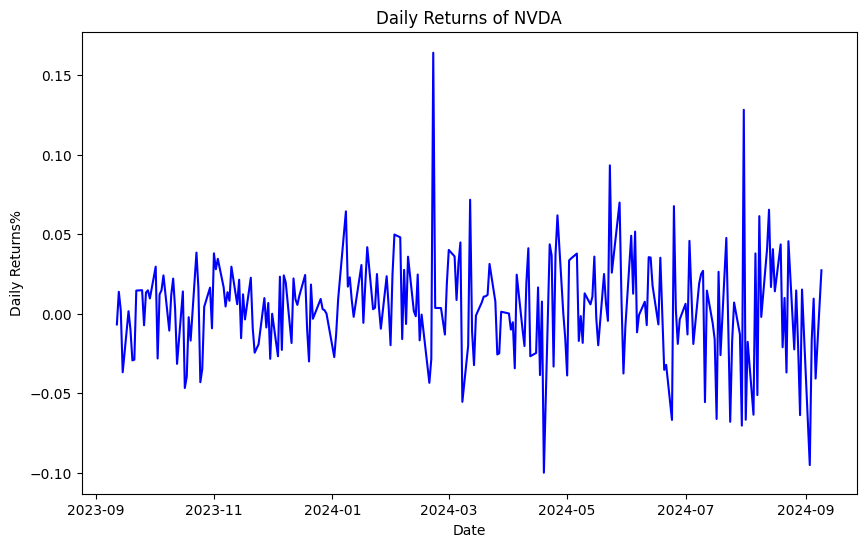

In [31]:
#calulate daily returns
data['Daily Returns']=data['Close'].pct_change() #percentage change

#plotting
plt.figure(figsize=(10,6))
plt.plot(data['Daily Returns'], label='Daily returns',color='blue')
plt.title('Daily Returns of NVDA')
plt.xlabel('Date')
plt.ylabel('Daily Returns%')
plt.show()



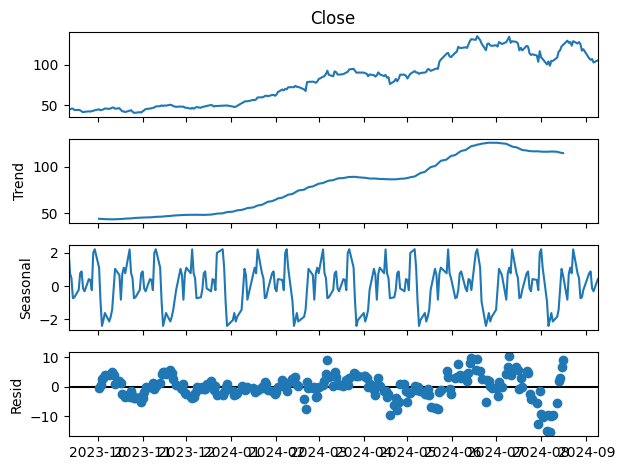

In [32]:
#Time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data['Close'], model='additive', filt=None, period=30, two_sided=True, extrapolate_trend=0)
decomp.plot()
plt.show()

In [35]:
#Training of ARIMA model (

#check for stationary by differencing
stock_price_diff=data['Close'].diff().dropna()
stock_price_diff.head()

,Close
Date,
2023-09-12,-0.308002
2023-09-13,0.615002
2023-09-14,0.096001
2023-09-15,-1.681000
2023-09-18,0.065998


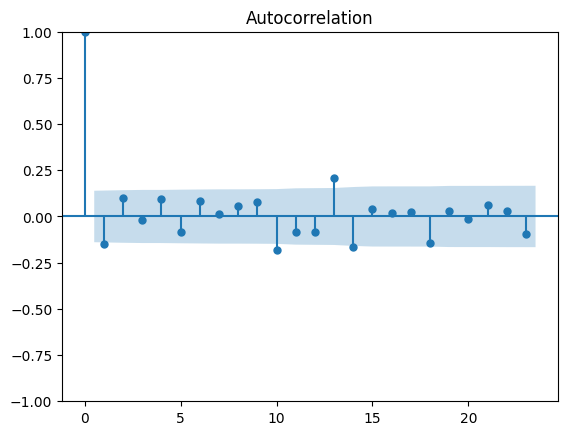

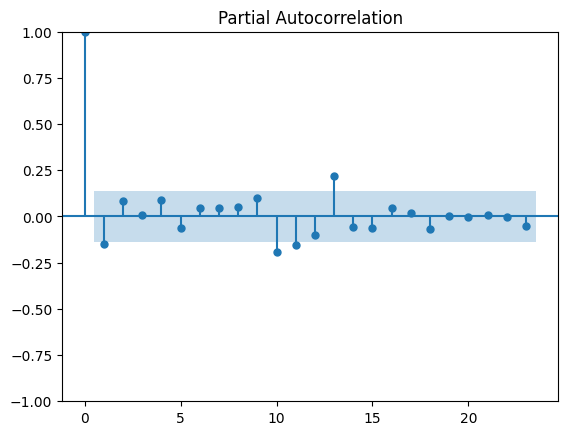

In [45]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Difference the data
data["stock_price_diff"] = data["Close"].diff().dropna()
data.dropna(inplace=True)

# Plot acf and pacf
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,6), dpi=80)
plot_acf(data['stock_price_diff'])
plot_pacf(data['stock_price_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [104]:
from statsmodels.tsa.arima.model import ARIMA

#fit model
model_arima=ARIMA(stock_price_diff,order=(5,1,5))
model_fit=model_arima.fit() #fitted model

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -620.419
Date:                Mon, 09 Sep 2024   AIC                           1262.837
Time:                        17:49:35   BIC                           1301.529
Sample:                             0   HQIC                          1278.411
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9855      0.070    -13.987      0.000      -1.124      -0.847
ar.L2         -0.1717      0.076     -2.267      0.023      -0.320      -0.023
ar.L3         -0.7679      0.057    -13.536      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
#predicting future values
prediction=model_fit.forecast(steps=20)

#Convert forecasted changes into actual predicted prices by computing the cumulative sum of predictions
# and adding the last observed value from the historical data.
prediction_prices=prediction.cumsum()+data['Close'].iloc[-1]
(prediction_prices)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
250,105.417128
251,104.732018
252,105.184226
253,107.671090
254,106.557973
255,108.512442
256,105.468017
257,107.548132
258,106.293097
259,108.729249


In [106]:
data.shape[0]

198

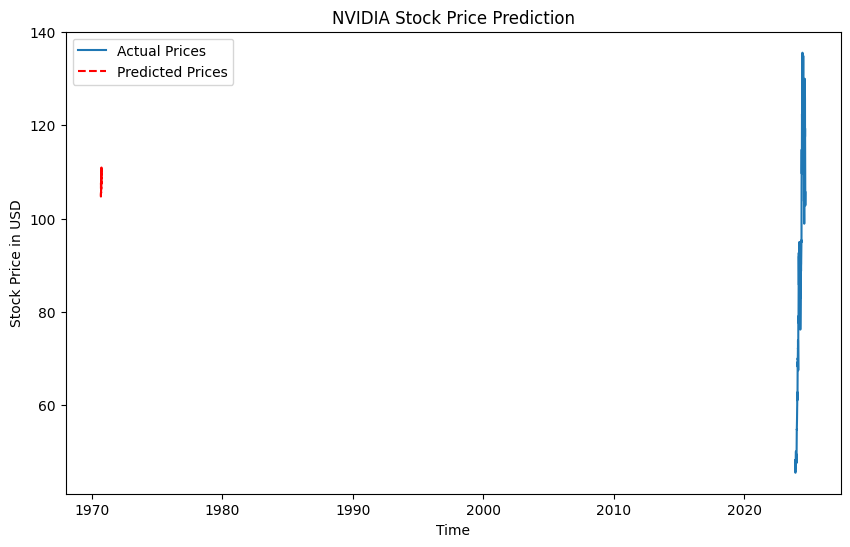

In [108]:
#visualise predictions

plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(prediction_prices,label='Predicted Prices',linestyle='--',color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price in USD')
plt.title('NVIDIA Stock Price Prediction')
plt.show()


In [109]:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


actual_values = data['Close'].values[-10:]
predicted_values = prediction_prices.values[-10:]
# Calculate metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 129.27885403854708
Root Mean Squared Error (RMSE): 11.370085929250802
Mean Absolute Error (MAE): 9.329708987109132
R-squared (R2): -0.4882283272845953


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure predicted_values and actual_values have the same length
if len(predicted_values) != len(actual_values):
    raise ValueError("Length of predicted_values and actual_values must be the same.")

# Calculate metrics

rmse = mean_squared_error(actual_values, predicted_values, squared=False)
mae = mean_absolute_error(actual_values, predicted_values)


# Print the results

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')



Root Mean Squared Error (RMSE): 11.370085929250802
Mean Absolute Error (MAE): 9.329708987109132


In [101]:
#Augemented Dickey-Fuller test for p,d,q values
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')

ADF Statistic: -1.607744717972046
p-value: 0.479702012389436
d-value: 13
q-value: 184


In [112]:
#NOTE: P,D,Q values have been deliberately taken small so as to ensure faster execution, this in turn has affecetd the accuracy of the model; Change p,d,q values accordingly

In [113]:
import time

while True:
    # Fetch latest stock data
    new_data = yf.download(ticker, period='1d', interval='1m')  # Real-time updates

    # Update and predict
    model_fit = model_arima.fit()
    predictions = model_fit.forecast(steps=10)

    print(predictions)
    time.sleep(60)  # Update every minute


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

250   -0.212770
251   -0.685110
252    0.452208
253    2.486864
254   -1.113117
255    1.954468
256   -3.044425
257    2.080116
258   -1.255036
259    2.436152
Name: predicted_mean, dtype: float64


KeyboardInterrupt: 

In [114]:
import pandas as pd

# Create the differenced series (first-order differencing)
data_diff = data['Close'].diff()

# Drop NaN values that result from the differencing
data_diff = data_diff.dropna()

# Display the first few rows of the differenced data
print(data_diff.head())


#running adf tests
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')

Date
2023-11-27    0.466000
2023-11-28   -0.421001
2023-11-29    0.319000
2023-11-30   -1.369999
2023-12-01   -0.005001
Name: Close, dtype: float64
ADF Statistic: -1.607744717972046
p-value: 0.479702012389436
d-value: 13
q-value: 184


In [115]:
# Apply second-order differencing
data_diff_2 = data_diff.diff()

# Drop NaN values
data_diff_2 = data_diff_2.dropna()

# Display the first few rows of the second-order differenced data
print(data_diff_2.head())

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')

Date
2023-11-28   -0.887001
2023-11-29    0.740002
2023-11-30   -1.688999
2023-12-01    1.364998
2023-12-04   -1.250000
Name: Close, dtype: float64
ADF Statistic: -1.607744717972046
p-value: 0.479702012389436
d-value: 13
q-value: 184


In [118]:
# Apply third-order differencing
data_diff_3 = data_diff_2.diff().dropna()

# Run the ADF test again
result = adfuller(data_diff_3)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'd-value: {result[2]}')
print(f'q-value: {result[3]}')
#The series is now strongly stationary

ADF Statistic: -6.825403974885159
p-value: 1.953690778419805e-09
d-value: 15
q-value: 179


In [119]:
from statsmodels.tsa.arima.model import ARIMA

#fit model
model_arima=ARIMA(stock_price_diff,order=(5,3,5))
model_fit=model_arima.fit() #fitted model

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 3, 5)   Log Likelihood                -667.608
Date:                Mon, 09 Sep 2024   AIC                           1357.215
Time:                        18:36:55   BIC                           1395.819
Sample:                             0   HQIC                          1372.757
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1662      0.103    -21.100      0.000      -2.367      -1.965
ar.L2         -2.7893      0.177    -15.778      0.000      -3.136      -2.443
ar.L3         -2.5020      0.215    -11.621      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
#predicting future values after 3 differencing
prediction=model_fit.forecast(steps=20)

#Convert forecasted changes into actual predicted prices by computing the cumulative sum of predictions
# and adding the last observed value from the historical data.
prediction_prices=prediction.cumsum()+data['Close'].iloc[-1]
(prediction_prices)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
250,104.232962
251,104.286011
252,104.441273
253,103.400420
254,103.676893
255,103.409566
256,102.781246
257,102.306880
258,102.340898
259,101.729779
